In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import utils as ut

In [2]:
sns.set_style("dark", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("paper")
sns.set(font_scale = 1.5)

In [3]:
lifestyle_file = "/data5/deepro/ukbiobank/analysis/lifestyle_factors/data/lifestyle_v2.xlsx"
store_dir = "/data5/deepro/ukbiobank/preprocess/rarecomb_pheno_prepare/data"
lifestyle_df = pd.read_excel(lifestyle_file)

# Continuous

In [4]:
cont_df = ut.get_continuous_factors(lifestyle_df, store_dir)

In [6]:
cont_df.loc[:, [26410, 26411, 26412, 26413, 26414, 26415, 26416, 26417]].corr()

,26410,26411,26412,26413,26414,26415,26416,26417
26410,1.000000,0.960820,0.929860,0.832281,0.834845,0.101273,0.471101,0.582223
26411,0.960820,1.000000,0.904617,0.756780,0.801537,0.062392,0.355342,0.509082
26412,0.929860,0.904617,1.000000,0.832638,0.798605,-0.097737,0.329779,0.381276
26413,0.832281,0.756780,0.832638,1.000000,0.621299,-0.037967,0.257929,0.261880
26414,0.834845,0.801537,0.798605,0.621299,1.000000,-0.112058,0.320365,0.297760
26415,0.101273,0.062392,-0.097737,-0.037967,-0.112058,1.000000,0.024155,0.246457
26416,0.471101,0.355342,0.329779,0.257929,0.320365,0.024155,1.000000,0.253351
26417,0.582223,0.509082,0.381276,0.261880,0.297760,0.246457,0.253351,1.000000


In [5]:
cont_deprivation_index_df = ut.standardize_df(cont_df.loc[:, [26410, 26426, 26427]])

In [6]:
cont_deprivation_index_df.describe()

,26410,26426,26427
count,176289.000000,7588.000000,11856.000000
mean,0.207500,0.172690,0.152928
std,0.168091,0.173580,0.167476
min,0.000000,0.000000,0.000000
25%,0.085146,0.049793,0.040676
50%,0.153213,0.103734,0.085949
75%,0.279887,0.244813,0.201254
max,1.000000,1.000000,1.000000


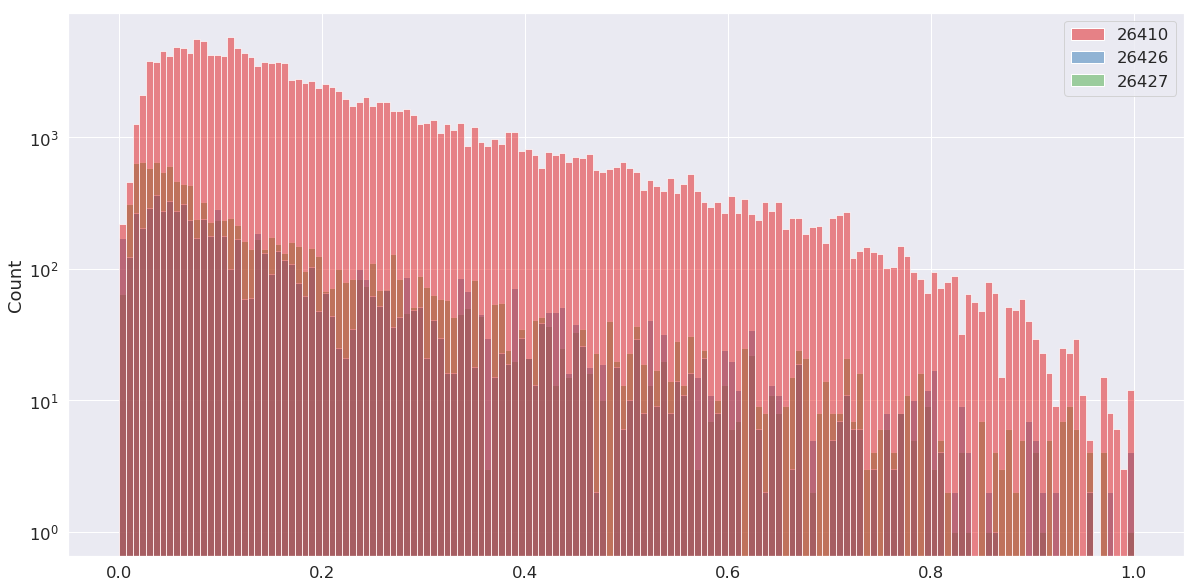

In [7]:
fig, axes = plt.subplots(figsize=(20,10))
sns.histplot(data=cont_deprivation_index_df, ax=axes, log_scale=[False, True], palette="Set1")

**Multiple index of deprivation accounts for other factors like education score, economic score etc. We have normalized them using min-max standardization to account for region wise (England, Scotland, Wales) differences and will use them as a single field for lifestyle factor**